In [ ]:
!pip install torch torchvision transformers pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.eval()


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving success_kid.jpeg to success_kid.jpeg
Saving drake_yes_no.jpg to drake_yes_no.jpg
Saving distracted_boyfriend.jpg to distracted_boyfriend.jpg


In [ ]:
def generate_caption(image_path):
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.eval()

def generate_caption(image_path):
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

def fgsm_attack(image_path, epsilon=0.03):
    image = Image.open(image_path).convert("RGB")

    # Step 1: Generate the original caption (used as pseudo-label)
    original_caption = generate_caption(image_path)
    print("Original Caption:", original_caption)

    # Step 2: Use processor to create correct inputs, including labels
    inputs = processor(images=image, text=original_caption, return_tensors="pt")
    inputs['pixel_values'].requires_grad = True
    inputs['labels'] = inputs['input_ids'] # Use the tokenized text as labels

    # Step 3: Set model to training mode to get loss
    model.train()
    outputs = model(**inputs)
    loss = outputs.loss

    if loss is None:
        raise ValueError("Loss is None — make sure both image and text are passed correctly.")

    print(f"Loss before attack: {loss.item():.4f}")
    loss.backward()

    # Step 4: Apply FGSM perturbation
    perturbed = inputs['pixel_values'] + epsilon * inputs['pixel_values'].grad.sign()
    perturbed = torch.clamp(perturbed, 0, 1)

    # Step 5: Convert back to image
    model.eval()
    attacked_img = transforms.ToPILImage()(perturbed.squeeze())
    return attacked_img

📷 Processing Image: success_kid.jpeg
🖼️ Original Caption:
a baby doll sitting on a white surface
Original Caption: a baby doll sitting on a white surface
Loss before attack: 0.8133
🎯 Caption After FGSM Attack:
a baby boy in a bi bi bi bi bi bi bi bi bi bi bi bi bi bi bi


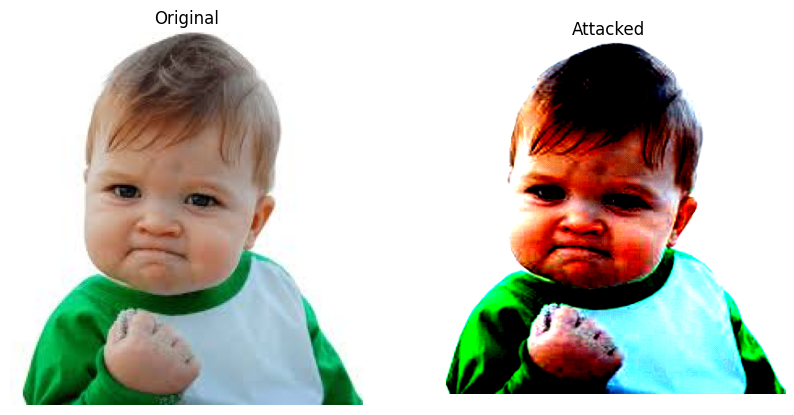


📷 Processing Image: drake_yes_no.jpg
🖼️ Original Caption:
drake - ' s new video for ' the game '
Original Caption: drake - ' s new video for ' the game '
Loss before attack: 1.9738
🎯 Caption After FGSM Attack:
a man in a red jacket and white shirt


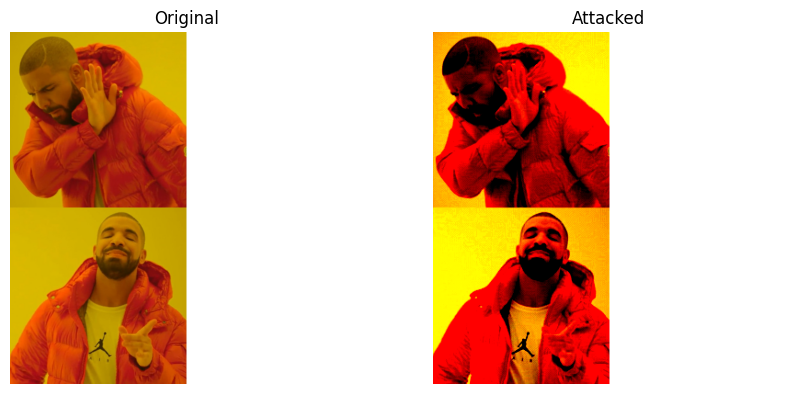


📷 Processing Image: distracted_boyfriend.jpg
🖼️ Original Caption:
three young people walking down the street in a city
Original Caption: three young people walking down the street in a city
Loss before attack: 0.8286
🎯 Caption After FGSM Attack:
a man and woman walking down the street


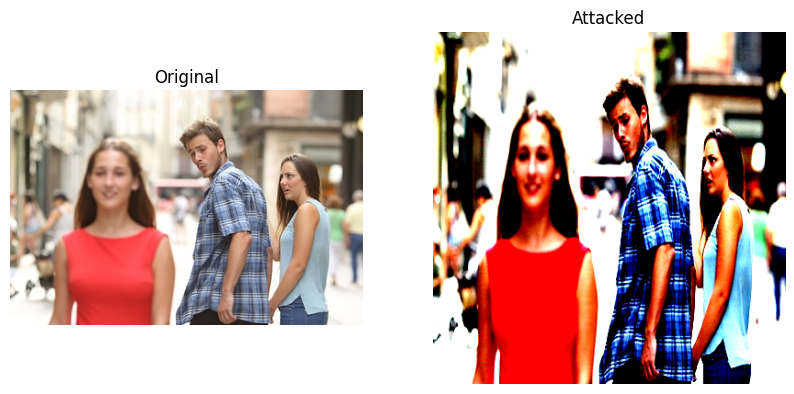

In [ ]:
for image_path in uploaded.keys():
    print("="*60)
    print(f"📷 Processing Image: {image_path}")

    # Generate original caption
    print("🖼️ Original Caption:")
    original_caption = generate_caption(image_path)
    print(original_caption)

    # Apply FGSM attack
    attacked_image = fgsm_attack(image_path, epsilon=0.03)
    attacked_image_filename = f"attacked_{image_path}"
    attacked_image.save(attacked_image_filename)

    # Generate new caption
    print("🎯 Caption After FGSM Attack:")
    attacked_caption = generate_caption(attacked_image_filename)
    print(attacked_caption)

    # Show side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(Image.open(image_path)); axs[0].set_title("Original")
    axs[1].imshow(attacked_image); axs[1].set_title("Attacked")
    for ax in axs: ax.axis('off')
    plt.show()

    print("="*60 + "\n")
